<a href="https://colab.research.google.com/github/minhvuong007/BaitapCNN_AI/blob/main/Tuan15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Bài 1. Nhận dạng món ăn**

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#Import Library
from keras.utils                  import np_utils
from keras.models                 import Sequential
from keras.layers                 import Dense, Activation, BatchNormalization, Dropout, LSTM
from keras.layers                 import Conv2D
from keras.layers                 import MaxPooling2D
from keras.layers                 import Flatten
from keras.callbacks              import EarlyStopping 
from tensorflow.keras.optimizers  import SGD
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.image             import imread

In [5]:
from keras import datasets, Sequential
from keras.layers import Conv2D, Dense, MaxPooling2D, Flatten
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np
from keras.utils import np_utils
from keras.datasets import cifar10
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
from keras.preprocessing import  image
from keras.preprocessing.image import load_img, img_to_array,array_to_img,ImageDataGenerator
import numpy as np
import os
import cv2 as cv
danhsach = ['Banhbeo','Banhcan','Banhcanh','Banhchung']
dir_train = '/content/drive/MyDrive/DoAn' 
distpath = []
y_train = []
x_train = []
x_test = []
y_test = []
# Create data
def create_data(dir, x_train, y_train):
  for i in danhsach:
    path = os.path.join(dir,i)
    index_label = danhsach.index(i)
    for j in os.listdir(path):
      img_path = os.path.join(path, j)
      img = image.load_img(img_path, target_size=(150,150))
      img = img_to_array(img)
      img = img.reshape(150,150,3)
      img = img.astype('float32')
      img = img/255
      x_train.append(img)
      y_train.append(index_label)
create_data(dir_train, x_train, y_train) 

x_train = np.array(x_train)
y_train = np.array(y_train)
y_train = np_utils.to_categorical(y_train)
print(x_train.shape) 
print(y_train.shape)


(314, 150, 150, 3)
(314, 4)


In [6]:
#Create model
model=Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(150, 150, 3))) 
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128,activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(4,activation='sigmoid'))


In [14]:
opt=SGD(learning_rate=0.01,momentum=0.9)
model.compile(loss='binary_crossentropy',optimizer=opt, metrics=['accuracy'])
history = model.fit(x_train,y_train,epochs = 100)


Epoch 1/100
10/10 [==============================] - 1s 24ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 2/100
10/10 [==============================] - 0s 21ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 3/100
10/10 [==============================] - 0s 20ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 4/100
10/10 [==============================] - 0s 19ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 5/100
10/10 [==============================] - 0s 19ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 6/100
10/10 [==============================] - 0s 19ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 7/100
10/10 [==============================] - 0s 17ms/step - loss: 0.0010 - accuracy: 1.0000
Epoch 8/100
10/10 [==============================] - 0s 18ms/step - loss: 0.0010 - accuracy: 1.0000
Epoch 9/100
10/10 [==============================] - 0s 18ms/step - loss: 9.8398e-04 - accuracy: 1.0000
Epoch 10/100
10/10 [==============================] - 0s 18ms/step - loss: 9.5295e-04 - accuracy

In [15]:
#Save file
model.save('/content/drive/MyDrive/DoAn/DoAn.h5')

Giá trị dự đoán: 0
Bánh bèo


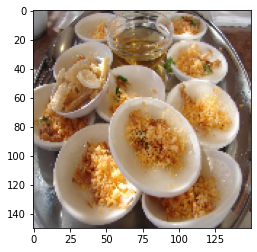

In [18]:
#Predict
pic = image.load_img('257.jpg', target_size=(150,150)) 
plt.imshow(pic)
pic = img_to_array(pic)
pic = pic.reshape(1,150,150,3) 
pic = pic.astype('float32')
pic = pic/255
np.argmax(model.predict(pic), axis=1)
print('Giá trị dự đoán:', np.argmax(model.predict(pic)))
if np.argmax(model.predict(pic)) == 0:
   print("Bánh bèo")
if np.argmax(model.predict(pic)) == 1:
   print("Bánh canh")
if np.argmax(model.predict(pic)) == 2:
   print("Bánh căn")
if np.argmax(model.predict(pic)) == 3:
   print("Bánh chưng")

#**Bài 2. Nhận dạng 10 loại trái cây**

In [19]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
#Import Library
from keras.utils                  import np_utils
from keras.models                 import Sequential
from keras.layers                 import Dense, Activation, BatchNormalization, Dropout, LSTM
from keras.layers                 import Conv2D
from keras.layers                 import MaxPooling2D
from keras.layers                 import Flatten
from keras.callbacks              import EarlyStopping 
from tensorflow.keras.optimizers  import SGD
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.image             import imread

In [22]:
from keras import datasets, Sequential
from keras.layers import Conv2D, Dense, MaxPooling2D, Flatten
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np
from keras.utils import np_utils
from keras.datasets import cifar10
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
from keras.preprocessing import  image
from keras.preprocessing.image import load_img, img_to_array,array_to_img,ImageDataGenerator
import numpy as np
import os
import cv2 as cv
danhsach = ['apple','carrot','cucumber','pear']
dir_train = '/content/drive/MyDrive/TraiCay' 
distpath = []
y_train = []
x_train = []
x_test = []
y_test = []
# Create data
def create_data(dir, x_train, y_train):
  for i in danhsach:
    path = os.path.join(dir,i)
    index_label = danhsach.index(i)
    for j in os.listdir(path):
      img_path = os.path.join(path, j)
      img = image.load_img(img_path, target_size=(150,150))
      img = img_to_array(img)
      img = img.reshape(150,150,3)
      img = img.astype('float32')
      img = img/255
      x_train.append(img)
      y_train.append(index_label)
create_data(dir_train, x_train, y_train) 

x_train = np.array(x_train)
y_train = np.array(y_train)
y_train = np_utils.to_categorical(y_train)
print(x_train.shape) 
print(y_train.shape)


(401, 150, 150, 3)
(401, 4)


In [23]:
#Create model
model=Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(150, 150, 3))) 
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128,activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(4,activation='sigmoid'))


In [24]:
opt=SGD(learning_rate=0.01,momentum=0.9)
model.compile(loss='binary_crossentropy',optimizer=opt, metrics=['accuracy'])
history = model.fit(x_train,y_train,epochs = 100)


Epoch 1/100
13/13 [==============================] - 1s 29ms/step - loss: 2.9760 - accuracy: 0.4040
Epoch 2/100
13/13 [==============================] - 0s 18ms/step - loss: 0.3062 - accuracy: 0.8279
Epoch 3/100
13/13 [==============================] - 0s 18ms/step - loss: 0.0545 - accuracy: 1.0000
Epoch 4/100
13/13 [==============================] - 0s 18ms/step - loss: 0.0083 - accuracy: 1.0000
Epoch 5/100
13/13 [==============================] - 0s 19ms/step - loss: 0.0025 - accuracy: 1.0000
Epoch 6/100
13/13 [==============================] - 0s 18ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 7/100
13/13 [==============================] - 0s 18ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 8/100
13/13 [==============================] - 0s 18ms/step - loss: 8.8993e-04 - accuracy: 1.0000
Epoch 9/100
13/13 [==============================] - 0s 18ms/step - loss: 7.8853e-04 - accuracy: 1.0000
Epoch 10/100
13/13 [==============================] - 0s 17ms/step - loss: 7.0049e-04 - accu

In [ ]:
#Save file
model.save('/content/drive/MyDrive/DoAn/DoAn.h5')

Giá trị dự đoán: 0
apple


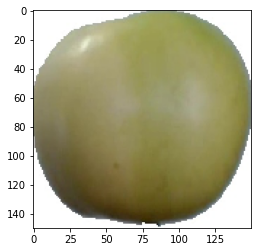

In [25]:
#Predict
pic = image.load_img('/content/r0_27.jpg', target_size=(150,150)) 
plt.imshow(pic)
pic = img_to_array(pic)
pic = pic.reshape(1,150,150,3) 
pic = pic.astype('float32')
pic = pic/255
np.argmax(model.predict(pic), axis=1)
print('Giá trị dự đoán:', np.argmax(model.predict(pic)))
if np.argmax(model.predict(pic)) == 0:
   print("apple")
if np.argmax(model.predict(pic)) == 1:
   print("carrot")
if np.argmax(model.predict(pic)) == 2:
   print("cucumber")
if np.argmax(model.predict(pic)) == 3:
   print("pear")

#**Bài 3. Nhận dạng 11 loại tiền giấy Việt Nam**

In [26]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
#Import Library
from keras.utils                  import np_utils
from keras.models                 import Sequential
from keras.layers                 import Dense, Activation, BatchNormalization, Dropout, LSTM
from keras.layers                 import Conv2D
from keras.layers                 import MaxPooling2D
from keras.layers                 import Flatten
from keras.callbacks              import EarlyStopping 
from tensorflow.keras.optimizers  import SGD
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.image             import imread

In [28]:
from keras import datasets, Sequential
from keras.layers import Conv2D, Dense, MaxPooling2D, Flatten
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np
from keras.utils import np_utils
from keras.datasets import cifar10
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
from keras.preprocessing import  image
from keras.preprocessing.image import load_img, img_to_array,array_to_img,ImageDataGenerator
import numpy as np
import os
import cv2 as cv
danhsach = ['500','1000','2000','500000']
dir_train = '/content/drive/MyDrive/Tiengiay' 
distpath = []
y_train = []
x_train = []
x_test = []
y_test = []
# Create data
def create_data(dir, x_train, y_train):
  for i in danhsach:
    path = os.path.join(dir,i)
    index_label = danhsach.index(i)
    for j in os.listdir(path):
      img_path = os.path.join(path, j)
      img = image.load_img(img_path, target_size=(150,150))
      img = img_to_array(img)
      img = img.reshape(150,150,3)
      img = img.astype('float32')
      img = img/255
      x_train.append(img)
      y_train.append(index_label)
create_data(dir_train, x_train, y_train) 

x_train = np.array(x_train)
y_train = np.array(y_train)
y_train = np_utils.to_categorical(y_train)
print(x_train.shape) 
print(y_train.shape)


(197, 150, 150, 3)
(197, 4)


In [29]:
#Create model
model=Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(150, 150, 3))) 
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128,activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(4,activation='sigmoid'))


In [30]:
opt=SGD(learning_rate=0.01,momentum=0.9)
model.compile(loss='binary_crossentropy',optimizer=opt, metrics=['accuracy'])
history = model.fit(x_train,y_train,epochs = 100)


Epoch 1/100
7/7 [==============================] - 1s 31ms/step - loss: 4.3727 - accuracy: 0.2234
Epoch 2/100
7/7 [==============================] - 0s 17ms/step - loss: 0.6466 - accuracy: 0.4213
Epoch 3/100
7/7 [==============================] - 0s 17ms/step - loss: 0.5322 - accuracy: 0.6751
Epoch 4/100
7/7 [==============================] - 0s 17ms/step - loss: 0.4338 - accuracy: 0.7310
Epoch 5/100
7/7 [==============================] - 0s 16ms/step - loss: 0.3192 - accuracy: 0.7970
Epoch 6/100
7/7 [==============================] - 0s 17ms/step - loss: 0.1990 - accuracy: 0.9492
Epoch 7/100
7/7 [==============================] - 0s 16ms/step - loss: 0.1371 - accuracy: 0.9594
Epoch 8/100
7/7 [==============================] - 0s 17ms/step - loss: 0.0894 - accuracy: 0.9848
Epoch 9/100
7/7 [==============================] - 0s 17ms/step - loss: 0.0568 - accuracy: 1.0000
Epoch 10/100
7/7 [==============================] - 0s 17ms/step - loss: 0.0363 - accuracy: 1.0000
Epoch 11/100
7/7 [=

In [31]:
#Save file
model.save('/content/drive/MyDrive/DoAn/DoAn.h5')

Giá trị dự đoán: 3
500000


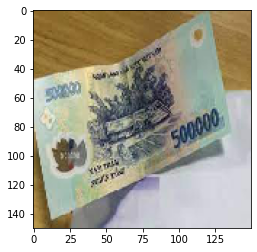

In [33]:
#Predict
pic = image.load_img('/content/drive/MyDrive/Tiengiay/500k.jfif', target_size=(150,150)) 
plt.imshow(pic)
pic = img_to_array(pic)
pic = pic.reshape(1,150,150,3) 
pic = pic.astype('float32')
pic = pic/255
np.argmax(model.predict(pic), axis=1)
print('Giá trị dự đoán:', np.argmax(model.predict(pic)))
if np.argmax(model.predict(pic)) == 0:
   print("500")
if np.argmax(model.predict(pic)) == 1:
   print("1000")
if np.argmax(model.predict(pic)) == 2:
   print("2000")
if np.argmax(model.predict(pic)) == 3:
   print("500000")